In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [9]:
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X['Sex'] = encoder.fit_transform(X['Sex'])
X['BP'] = encoder.fit_transform(X['BP'])
X['Cholesterol'] = encoder.fit_transform(X['Cholesterol'])

In [11]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle="true")

In [13]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,0,1,1,10.840
197,52,1,2,0,9.894
38,39,0,2,1,9.709
24,33,0,1,0,33.486
122,34,1,2,0,22.456
...,...,...,...,...,...
106,22,1,2,0,11.953
14,50,0,2,0,12.703
92,29,0,0,0,29.450
179,67,0,2,0,15.891


In [14]:
y_train

79     drugX
197    drugX
38     drugX
24     drugY
122    drugY
       ...  
106    drugX
14     drugX
92     drugY
179    drugY
102    drugC
Name: Drug, Length: 160, dtype: object

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
data_unpruned =DecisionTreeClassifier(max_depth=None, random_state=42)
data_model = data_unpruned.fit(X_train, y_train)
print("Performance without pruning:", data_model.score(X_test, y_test)) #model is perfect with no pruning required
print("At depth:", data_model.tree_.max_depth)

Performance without pruning: 1.0
At depth: 4


In [16]:
#fit model
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

<function matplotlib.pyplot.show(close=None, block=None)>

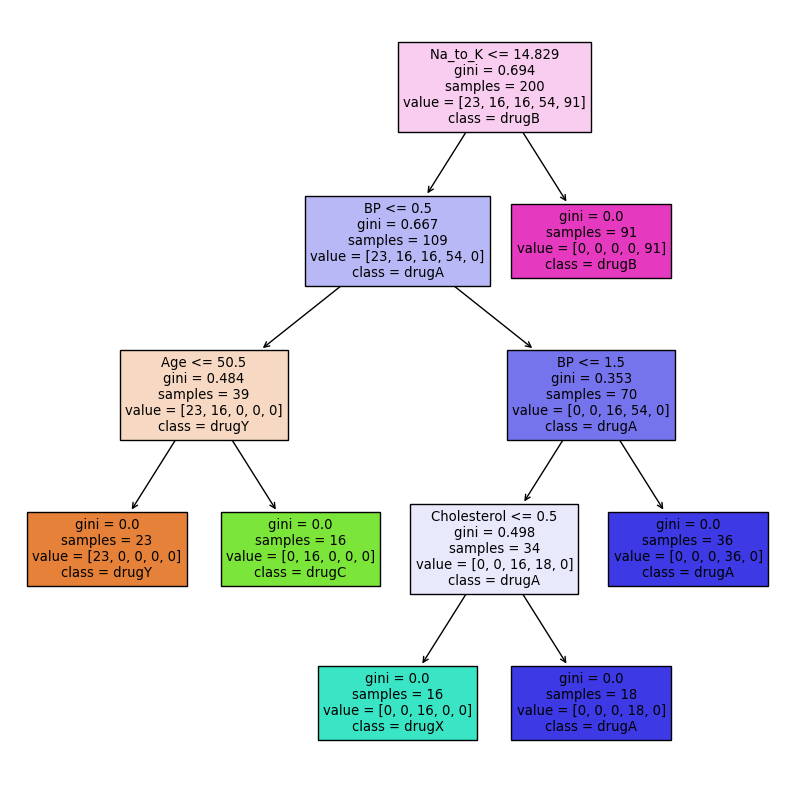

In [17]:
#plot decision tree
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=y.unique(), filled=True, ax=ax)
plt.show

In [18]:
#check accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = data_unpruned.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"accuracy : {accuracy}")

accuracy : 100.0


In [19]:
#print confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 6,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 15]], dtype=int64)